<a href="https://colab.research.google.com/github/SchoolSpice/COMP-542/blob/main/Video_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#HIT PLAY BUTTON TO THE LEFT OF EACH CODE BLOCK TO LOAD OR CLICK RUNTIME -> RUN ALL.
#Install is for latest matplotlib version
%pip install matplotlib==3.4.2
import pandas as pd
import numpy as np
import time
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
%matplotlib inline

simplefilter("ignore", category=ConvergenceWarning)

df = pd.read_csv('/content/drive/MyDrive/Video Game Data.csv')

df.head()

,ID,Game Title,Release Date,Price,Publisher,Independent Game,Youtube Videos,Metacritic Score,Commercial Success
0,1,It Takes Two,3/25/2021,39.99,Electronic Arts,No,13500,89,High
1,2,Cyberpunk 2077,12/9/2020,59.99,CD PROJEKT RED,No,27800,86,High
2,3,Risk of Rain 2,8/11/2020,24.99,Gearbox Publishing,Yes,1110,85,High
3,4,Fall Guys: Ultimate Knockout,8/3/2020,7.99,"Epic Games, Devolver Digital",Yes,4060,81,High
4,5,Lightmatter,1/15/2020,19.99,Aspyr,Yes,118,73,High


In [2]:
#Shrinking Table to just important features
df = df.loc[:,['Youtube Videos','Independent Game','Metacritic Score','Commercial Success']]
#Checking new table
df.head(5)

,Youtube Videos,Independent Game,Metacritic Score,Commercial Success
0,13500,No,89,High
1,27800,No,86,High
2,1110,Yes,85,High
3,4060,Yes,81,High
4,118,Yes,73,High


In [3]:
#Splitting the data into target (y) and features (X) to create train & test sets
y = df.pop('Commercial Success')
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y)

In [4]:
#Creating a Pipeline to handle scaling or encoding the 2 types of features: numeric and binary/categorical
numeric_features = ['Youtube Videos', 'Metacritic Score']
binary_features = ['Independent Game']

numeric_transformer = Pipeline(
    steps=[("scaler", PowerTransformer())]
)

binary_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(sparse=False, dtype='int', drop="if_binary",handle_unknown="ignore"))]
)

In [5]:
#Fitting and Transforming All Columns that Need to be Adjusted
col_transformer = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("binary", binary_transformer, binary_features)
    ],
    remainder='passthrough'
)

col_transformer.fit(X_train)
X_train = col_transformer.transform(X_train)
X_test = col_transformer.transform(X_test)

In [6]:
#Applying KNN To Dataset and printing time taken for model to run
classifier1 = KNeighborsClassifier(n_neighbors=5)

start_traintime_knn = time.time()
classifier1.fit(X_train, y_train)
end_traintime_knn = (time.time() - start_traintime_knn) * 1000

start_testtime_knn = time.time()
y_pred = classifier1.predict(X_test)
end_testtime_knn = (time.time() - start_testtime_knn) * 1000

knn_accuracy = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test,y_pred, average = 'weighted')

print('KNN Train Time: %0.2f ms '%end_traintime_knn)
print('KNN Test Time:%0.2f ms'%end_testtime_knn)

KNN Train Time: 1.34 ms 
KNN Test Time:2.86 ms


Text(0.5, 1.0, 'K-Nearest Neighbors Confusion Matrix')

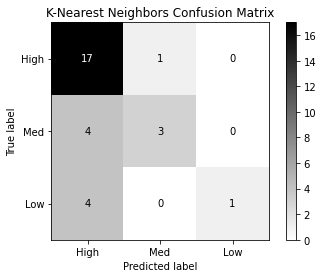

In [7]:
#Show KNN Confusion Matrix for results of predictions vs true values
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,labels=['High','Med','Low'],cmap = 'binary')
display.ax_.set_title("K-Nearest Neighbors Confusion Matrix")

In [8]:
# KNN Report Scores on Accuracy 
print('KNN Classification Report')
print(classification_report(y_test, y_pred, zero_division= 0))
print('Accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Weighted F1 score is {}'.format(f1_score(y_test,y_pred, average = 'weighted')))

KNN Classification Report
              precision    recall  f1-score   support

        High       0.68      0.94      0.79        18
         Low       1.00      0.20      0.33         5
         Med       0.75      0.43      0.55         7

    accuracy                           0.70        30
   macro avg       0.81      0.52      0.56        30
weighted avg       0.75      0.70      0.66        30

Accuracy score is 0.7
Weighted F1 score is 0.6572468874794456


In [9]:
#Now Running Random Forest and printing time taken for model to run
classifier2 = RandomForestClassifier(n_estimators=5, random_state=0)

start_traintime_rf = time.time()
classifier2.fit(X_train, y_train)
end_traintime_rf = (time.time() - start_traintime_rf) * 1000

start_testtime_rf = time.time()
y_pred = classifier2.predict(X_test)
end_testtime_rf = (time.time() - start_testtime_rf) * 1000

rf_accuracy = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test,y_pred, average = 'weighted')

print('Random Forest Train Time: %0.2f ms '%end_traintime_rf)
print('Random Forest Test Time:%0.2f ms'%end_testtime_rf)

Random Forest Train Time: 20.21 ms 
Random Forest Test Time:5.39 ms


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

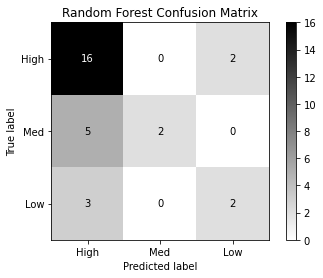

In [10]:
#Show RF Confusion Matrix for results of predictions vs true values
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=['High','Med','Low'], cmap = 'binary')
display.ax_.set_title("Random Forest Confusion Matrix")

In [11]:
print('RF Classification Report')
print(classification_report(y_test, y_pred, zero_division= 0))
print('Accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Weighted F1 score is {}'.format(f1_score(y_test,y_pred, average = 'weighted')))

RF Classification Report
              precision    recall  f1-score   support

        High       0.67      0.89      0.76        18
         Low       0.50      0.40      0.44         5
         Med       1.00      0.29      0.44         7

    accuracy                           0.67        30
   macro avg       0.72      0.52      0.55        30
weighted avg       0.72      0.67      0.63        30

Accuracy score is 0.6666666666666666
Weighted F1 score is 0.6349206349206349


In [12]:
#Now Running SVM and printing time taken for model to run
classifier3 = SVC(kernel = 'linear')

start_traintime_svc = time.time()
classifier3.fit(X_train, y_train)
end_traintime_svc = (time.time() - start_traintime_rf) * 1000

start_testtime_svc = time.time()
y_pred = classifier3.predict(X_test)
end_testtime_svc = (time.time() - start_testtime_svc) * 1000

svc_accuracy = accuracy_score(y_test, y_pred)
svc_f1 = f1_score(y_test,y_pred, average = 'weighted')

print('Support Vector Machine Train Time: %0.2f ms '%end_traintime_svc)
print('Support Vector Machine Test Time:%0.2f ms'%end_testtime_svc)

Support Vector Machine Train Time: 323.64 ms 
Support Vector Machine Test Time:0.57 ms


Text(0.5, 1.0, 'Support Vector Machine Confusion Matrix')

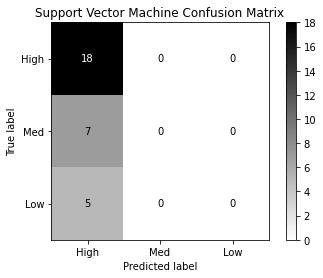

In [13]:
#Show SVC Confusion Matrix for results of predictions vs true values
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=['High','Med','Low'], cmap = 'binary')
display.ax_.set_title("Support Vector Machine Confusion Matrix")

In [14]:
print('Support Vector Machine Classification Report')
print(classification_report(y_test, y_pred, zero_division= 0))
print('Accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Weighted F1 score is {}'.format(f1_score(y_test,y_pred, average = 'weighted')))

Support Vector Machine Classification Report
              precision    recall  f1-score   support

        High       0.60      1.00      0.75        18
         Low       0.00      0.00      0.00         5
         Med       0.00      0.00      0.00         7

    accuracy                           0.60        30
   macro avg       0.20      0.33      0.25        30
weighted avg       0.36      0.60      0.45        30

Accuracy score is 0.6
Weighted F1 score is 0.44999999999999996


In [15]:
#Now Running MLP (Artificial Neural Network) and printing time taken for model to run
classifier4 = MLPClassifier(random_state=0)

start_traintime_ann = time.time()
classifier4.fit(X_train, y_train)
end_traintime_ann = (time.time() - start_traintime_rf) * 1000

start_testtime_ann = time.time()
y_pred = classifier4.predict(X_test)
end_testtime_ann = (time.time() - start_testtime_svc) * 1000

ann_accuracy = accuracy_score(y_test, y_pred)
ann_f1 = f1_score(y_test,y_pred, average = 'weighted')

print('Artificial Neural Network Train Time: %0.2f ms '%end_traintime_ann)
print('Artificial Neural Network Test Time:%0.2f ms'%end_testtime_ann)

Artificial Neural Network Train Time: 861.23 ms 
Artificial Neural Network Test Time:538.03 ms


Text(0.5, 1.0, 'Artificial Neural Network (MLP) Confusion Matrix')

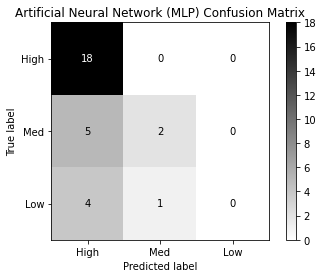

In [16]:
#Show MLP (Artificial Neural Network) Confusion Matrix for results of predictions vs true values
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=['High','Med','Low'], cmap = 'binary')
display.ax_.set_title("Artificial Neural Network (MLP) Confusion Matrix")

In [17]:
print('Artificial Neural Network (MLP) Classification Report')
print(classification_report(y_test, y_pred, zero_division= 0))
print('Accuracy score is {}'.format(accuracy_score(y_test, y_pred)))
print('Weighted F1 score is {}'.format(f1_score(y_test,y_pred, average = 'weighted')))

Artificial Neural Network (MLP) Classification Report
              precision    recall  f1-score   support

        High       0.67      1.00      0.80        18
         Low       0.00      0.00      0.00         5
         Med       0.67      0.29      0.40         7

    accuracy                           0.67        30
   macro avg       0.44      0.43      0.40        30
weighted avg       0.56      0.67      0.57        30

Accuracy score is 0.6666666666666666
Weighted F1 score is 0.5733333333333334


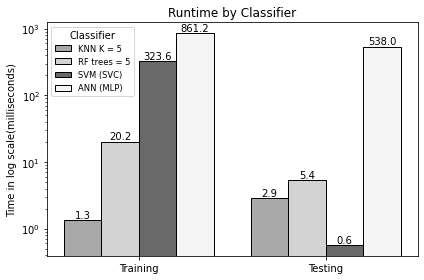

In [18]:
#Chart Showing Performance Time Difference Between KNN,RF,SVM,and ANN

labels = ['Training', 'Testing']
knn_times = [end_traintime_knn,end_testtime_knn]
rf_times = [end_traintime_rf,end_testtime_rf]
svc_times = [end_traintime_svc,end_testtime_svc]
ann_times = [end_traintime_ann,end_testtime_ann]

ar = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(ar - (width * 2) + width/2, knn_times, width, label = 'KNN K = 5', color = 'darkgrey', edgecolor ='black', log = 'True')
rects2 = ax.bar(ar - width/2, rf_times, width, label = 'RF trees = 5', color = 'lightgrey', edgecolor ='black')
rects3 = ax.bar(ar + width/2, svc_times, width, label = 'SVM (SVC)', color = 'dimgrey', edgecolor ='black')
rects4 = ax.bar(ar + (width * 2) - width/2, ann_times, width, label = 'ANN (MLP)', color = 'whitesmoke', edgecolor ='black')

ax.set_ylabel('Time in log scale(milliseconds)')
ax.set_title('Runtime by Classifier')
ax.set_xticks(ar)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', title='Classifier',fontsize = 'small')
ax.bar_label(rects1, fmt='%.1f')
ax.bar_label(rects2, fmt='%.1f')
ax.bar_label(rects3, fmt='%.1f')
ax.bar_label(rects4, fmt='%.1f')

fig.tight_layout()

plt.show()

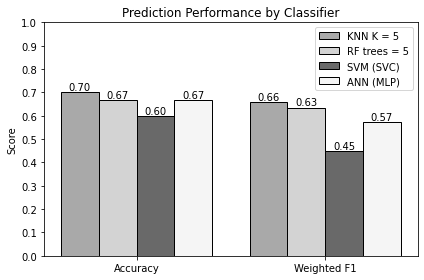

In [19]:
#Chart Showing Prediction Performance Difference Between KNN,RF,SVM,and ANN

labels = ['Accuracy', 'Weighted F1']
knn_perf = [knn_accuracy,knn_f1]
rf_perf = [rf_accuracy,rf_f1]
svc_perf = [svc_accuracy,svc_f1]
ann_perf = [ann_accuracy,ann_f1]

ar = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(ar - (width * 2) + width/2, knn_perf, width, label = 'KNN K = 5', color = 'darkgrey', edgecolor ='black')
rects2 = ax.bar(ar - width/2, rf_perf, width, label = 'RF trees = 5', color = 'lightgrey', edgecolor ='black')
rects3 = ax.bar(ar + width/2, svc_perf, width, label = 'SVM (SVC)', color = 'dimgrey', edgecolor ='black')
rects4 = ax.bar(ar + (width * 2) - width/2, ann_perf, width, label = 'ANN (MLP)', color = 'whitesmoke', edgecolor ='black')

ax.set_title('Prediction Performance by Classifier')
ax.set_xticks(ar)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylabel('Score')
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, fmt='%.2f')
ax.bar_label(rects2, fmt='%.2f')
ax.bar_label(rects3, fmt='%.2f')
ax.bar_label(rects4, fmt='%.2f')

fig.tight_layout()

plt.show()

In [20]:
#All Model Accuracies
print('K-Nearest Neighbors Accuracy: %0.2f'%knn_accuracy)
print('Random Forest Accuracy: %0.2f'%rf_accuracy)
print('Support Vector Machine Accuracy: %0.2f'%svc_accuracy)
print('Artificial Neural Network Accuracy: %0.2f'%ann_accuracy)

K-Nearest Neighbors Accuracy: 0.70
Random Forest Accuracy: 0.67
Support Vector Machine Accuracy: 0.60
Artificial Neural Network Accuracy: 0.67
